# gdp and hk recycling volume per day

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.127e+04   1006.605     11.193      0.000    9152.202    1.34e+04
HK GDP        -0.0022      0.000     -5.059      0.000      -0.003      -0.001

R-squared: 0.5871


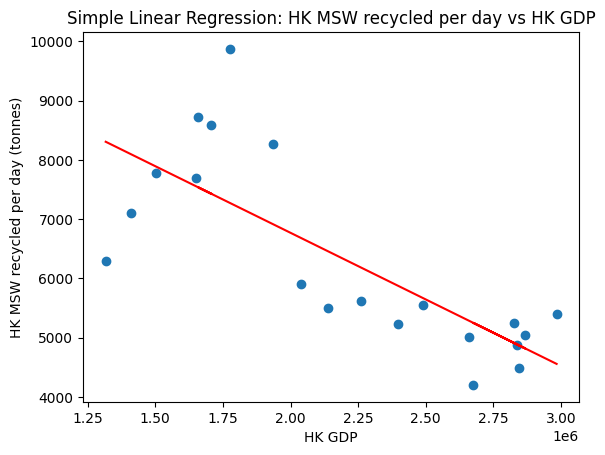

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per day vs HK GDP

# Prepare data ---------------------------------------------------------
# Ensure numeric types
df["HK GDP"] = pd.to_numeric(df["HK GDP"], errors="coerce")
df["HK total MSW recycled (tonnes)"] = pd.to_numeric(
    df["HK total MSW recycled (tonnes)"], errors="coerce"
)

# Add number of days in each year (leap years: 2004, 2008, 2012, 2016, 2020, 2024)
leap_years = [2004, 2008, 2012, 2016, 2020, 2024]
df["Year"] = df["Year"].astype("Int64")  # make sure Year is integer
df["days_in_year"] = df["Year"].apply(
    lambda y: 366 if (pd.notna(y) and int(y) in leap_years) else 365
)

# Compute recycling volume per day (tonnes/day)
df["HK MSW recycled per day (tonnes)"] = (
    df["HK total MSW recycled (tonnes)"] / df["days_in_year"]
)

# Keep rows where all relevant variables are available
mask = (
    df["HK GDP"].notna()
    & df["HK total MSW recycled (tonnes)"].notna()
    & df["HK MSW recycled per day (tonnes)"].notna()
)
X_gdp = df.loc[mask, ["HK GDP"]]
y_recycled_per_day = df.loc[mask, "HK MSW recycled per day (tonnes)"]

# Fit model using sklearn for predictions ------------------------------
lin_reg_gdp_rec = LinearRegression()
lin_reg_gdp_rec.fit(X_gdp, y_recycled_per_day)

# Fit model using statsmodels for statistical tests --------------------
X_gdp_sm = sm.add_constant(X_gdp)  # Add constant term for intercept
model_gdp_rec = sm.OLS(y_recycled_per_day, X_gdp_sm)
results_gdp_rec = model_gdp_rec.fit()

# Predictions for plotting ---------------------------------------------
y_pred_rec_per_day = lin_reg_gdp_rec.predict(X_gdp)

print("Model Summary:")
print(results_gdp_rec.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gdp_rec.rsquared:.4f}")

# Plot -----------------------------------------------------------------
plt.scatter(X_gdp, y_recycled_per_day)
plt.plot(X_gdp, y_pred_rec_per_day, color="red")
plt.xlabel("HK GDP")
plt.ylabel("HK MSW recycled per day (tonnes)")
plt.title("Simple Linear Regression: HK MSW recycled per day vs HK GDP")
plt.show()


**GDP coefficient ($\hat \beta_1$) ≈ -0.00225 (p < 0.001 < 0.05)**  

- There is a **statistically significant negative association** between HK GDP and the daily volume of MSW recycled. As GDP increases, the amount of waste recycled per day tends to **slightly decrease**.  

- The **R-squared is moderate (~0.59)**, meaning HK GDP explains **around 60% of the variation** in daily recycling volume; the remaining variation is likely driven by other factors such as waste policies, market demand for recyclables, and changes in residents’ recycling behaviour.
